# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

In [46]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

sns.set()

In [47]:
countries = pd.read_csv("countries.csv",decimal = '.')

In [48]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

Conforme foi aprendido nessa lição, foi utilizada a cópia no dataset para não modificar o dataset original.

In [49]:
#utilizando uma cópia para não causar modificações permanentes no dataset
countries_copia = countries.copy()
#ajustando os tipos de dados 
filtro_float = ['Pop_density','Coastline_ratio','Net_migration','Infant_mortality','Literacy','Phones_per_1000','Arable','Crops','Other','Birthrate','Deathrate','Agriculture','Industry','Service','Climate']
for coluna in filtro_float:
    countries_copia[coluna] = countries_copia[coluna].str.replace(',','.')
    countries_copia[coluna]=countries_copia[coluna].astype('float')
countries_copia.head(5)
countries_copia.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_density         float64
Coastline_ratio     float64
Net_migration       float64
Infant_mortality    float64
GDP                 float64
Literacy            float64
Phones_per_1000     float64
Arable              float64
Crops               float64
Other               float64
Climate             float64
Birthrate           float64
Deathrate           float64
Agriculture         float64
Industry            float64
Service             float64
dtype: object

Agora, as features categóricas precisam ter seus valores ajustados, retirando o espaço desnecessário:

In [50]:
for coluna in ['Country','Region']:
    countries_copia[coluna] = countries_copia[coluna].str.strip()
countries_copia.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

A ideia é pegar o conjunto dos valores únicos com o set(), transformar no tipo list, e aplicar a função sorted, para deixar em ordem alfabética:

In [51]:
sorted(list(set(countries_copia['Region'])))

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [52]:
from sklearn.preprocessing import KBinsDiscretizer
kbd = KBinsDiscretizer(n_bins = 10,encode = 'ordinal',strategy = 'quantile')

In [53]:
countries_copia['Pop_density'] = kbd.fit_transform(countries_copia[['Pop_density']])
countries_copia['Pop_density'].value_counts()

9.0    23
5.0    23
0.0    23
8.0    23
1.0    23
6.0    23
3.0    23
4.0    22
2.0    22
7.0    22
Name: Pop_density, dtype: int64

A ideia é contar quantos elementos tem a classificação acima de 8, que equivale ao 90º percentil.

In [54]:
print("Numero de países: ",len(countries_copia.loc[countries_copia['Pop_density']>8]))

Numero de países:  23


# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

Antes de ver o número de novos atributos, foram vistos as categorias existentes:

In [55]:
countries_copia['Region'].value_counts()

SUB-SAHARAN AFRICA      51
LATIN AMER. & CARIB     45
ASIA (EX. NEAR EAST)    28
WESTERN EUROPE          28
OCEANIA                 21
NEAR EAST               16
C.W. OF IND. STATES     12
EASTERN EUROPE          12
NORTHERN AFRICA          6
NORTHERN AMERICA         5
BALTICS                  3
Name: Region, dtype: int64

In [56]:
countries_copia['Climate'].value_counts()

2.0    111
3.0     48
1.0     29
1.5      8
4.0      6
2.5      3
Name: Climate, dtype: int64

Agora será utilizada a função _one-hot encoding_ nas duas features:

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
#configurando a instância da função:
encod = OneHotEncoder(sparse = False,dtype=np.int)
cat_feat = ['Climate','Region']

In [59]:
pd.DataFrame({'Nº (NaN)':countries_copia[cat_feat].isna().sum(axis=0),"Tipo de dado":countries_copia[cat_feat].dtypes })

,Nº (NaN),Tipo de dado
Climate,22,float64
Region,0,object


Antes de aplicar a função OneHotEncoding, é necessário imputar os valores nulos. Para a variável climate, será colocado o tipo: 0, referente a Unknown

In [60]:
countries_copia['Climate'] = countries_copia['Climate'].fillna(0)

In [61]:
cat_encod = encod.fit_transform(countries_copia[cat_feat])

In [64]:
print("Número de novas features: ",cat_encod.shape[1])

Número de novas features:  18


## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [65]:
data_exp = pd.DataFrame({'coluna':countries_copia.columns,'tipo de dado':countries_copia.dtypes})
var_int64 = list(data_exp['coluna'].loc[data_exp['tipo de dado']=='int64'].values)
var_float64 = list(data_exp['coluna'].loc[data_exp['tipo de dado']=='float64'].values)
var_qt4 = var_int64 + var_float64

In [66]:
var_qt4

['Population',
 'Area',
 'Pop_density',
 'Coastline_ratio',
 'Net_migration',
 'Infant_mortality',
 'GDP',
 'Literacy',
 'Phones_per_1000',
 'Arable',
 'Crops',
 'Other',
 'Climate',
 'Birthrate',
 'Deathrate',
 'Agriculture',
 'Industry',
 'Service']

In [67]:
countries_copia.isna().sum(axis=0)

Country              0
Region               0
Population           0
Area                 0
Pop_density          0
Coastline_ratio      0
Net_migration        3
Infant_mortality     3
GDP                  1
Literacy            18
Phones_per_1000      4
Arable               2
Crops                2
Other                2
Climate              0
Birthrate            3
Deathrate            4
Agriculture         15
Industry            16
Service             15
dtype: int64

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
pipel = Pipeline(steps =[('Imput_Mediana',SimpleImputer(strategy = "median")),('Padronizacao',StandardScaler())])

In [69]:
pipel.fit_transform(countries_copia[var_qt4])

array([[ 0.01969468,  0.02758332, -0.52133238, ...,  1.63657562,
        -0.31540576, -1.1611354 ],
       [-0.21387688, -0.31879748,  0.51980355, ...,  0.59516349,
        -0.70631815,  0.08342432],
       [ 0.03561811,  0.99842051, -1.215423  , ..., -0.32662697,
         2.39091078, -1.67396905],
       ...,
       [-0.06192308, -0.03933023, -0.52133238, ..., -0.08738364,
         1.4286649 , -1.0798325 ],
       [-0.14654488,  0.08642673, -1.215423  , ...,  0.51072467,
         0.06047154, -0.47944188],
       [-0.14029829, -0.11624192, -0.86837769, ...,  0.22222537,
        -0.29285312,  0.08342432]])

In [70]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [71]:
result_q4 = pipel.transform(np.array(test_country[2:]).reshape(1,-1))

In [72]:
data_exp.index = range(0,len(data_exp))

In [73]:
data_exp

,coluna,tipo de dado
0,Country,object
1,Region,object
2,Population,int64
3,Area,int64
4,Pop_density,float64
5,Coastline_ratio,float64
6,Net_migration,float64
7,Infant_mortality,float64
8,GDP,float64
9,Literacy,float64


In [78]:
print("Resultado: ",result_q4[0,9].round(3))

Resultado:  -1.047


## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

Para verificar de forma visual, usou-se o boxplot:

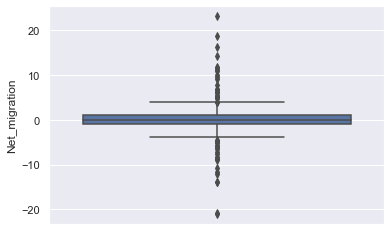

In [85]:
sns.boxplot(countries_copia['Net_migration'],orient = 'v')

In [86]:
IQR = countries_copia['Net_migration'].quantile(0.75) - countries_copia['Net_migration'].quantile(0.25)
outliers_abaixo = countries_copia['Net_migration'].loc[(countries_copia['Net_migration'] < countries_copia['Net_migration'].quantile(0.25) - 1.5*IQR)]
outliers_acima = countries_copia['Net_migration'].loc[(countries_copia['Net_migration'] > countries_copia['Net_migration'].quantile(0.75) + 1.5*IQR )]

In [87]:
(len(outliers_abaixo) + len(outliers_acima))/ len(countries_copia['Net_migration'])

0.22026431718061673

Representando 22% dos dados, não seria uma boa alternativa, dado que podem indicar alguma eventualidade nos locais.

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

Importando as bibliotecas necessárias e aplicando as instâncias:

In [89]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
CV = CountVectorizer()

Selecionando as categorias para a análise:

In [90]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

Aplicando a função CountVectorizer:

In [95]:
newsgroup_counts = CV.fit_transform(newsgroup.data)
phone_id = CV.vocabulary_.get('phone')

In [97]:
print("Numero de vezes que a palavra phone aparece: ",newsgroup_counts[:,19211].toarray().sum())

Numero de vezes que a palavra phone aparece:  213


## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

Criando a instância da função TfidVectorizer:

In [98]:
tf_idf = TfidfVectorizer()

Com isso, aplicando a função no dataset newsgroup, para a palavra _phone_ obtém-se:

In [99]:
tf_idf_newsgroup = tf_idf.fit_transform(newsgroup.data)
print("Tf-idf de phone: ",tf_idf_newsgroup[:,phone_id].toarray().sum().round(3))

Tf-idf de phone:  8.888
